In [2]:
import pandas as pd
import numpy as np
from datetime import timedelta

In [3]:
file_path = "C:/Users/Jeremy S Obozuwa/Documents/Book1.csv"
df = pd.read_csv(file_path)

In [4]:
print(df.head())

      amount_in    amount_out   in_token  out_token           platform  \
0  2.240868e+00  4.249080e+07       WSOL     $25.8m         pumpdotfun   
1  2.816123e+04  1.980000e+00        BTC       WSOL            raydium   
2  4.043684e+07  1.485000e+00  æ£’ä¸­æŒ‡       WSOL  raydium_launchlab   
3  4.620261e+06  2.475000e-01  æ£’ä¸­æŒ‡       WSOL  raydium_launchlab   
4  2.576764e+00  4.505710e+07       WSOL  æ£’ä¸­æŒ‡  raydium_launchlab   

                     timestamp  \
0  2025-07-03 06:19:27.000 UTC   
1  2025-07-03 06:25:57.000 UTC   
2  2025-07-03 06:30:51.000 UTC   
3  2025-07-03 06:31:08.000 UTC   
4  2025-07-03 06:31:20.000 UTC   

                                             tx_hash  volume_usd  \
0  38QSi6fxtJsWUyZudkEq1UNFRXrpvuxeFXgypXsUisDcei...  347.984331   
1  2M2YYdMRZdopiBjcaz3kykeAJoig6uJiXSgjcduazbnXSQ...  307.711800   
2  5T9gTV3Lw982t9taYxpsVhCiso7NF4fPr25ZHU5nbqYbxW...  230.843250   
3  2FXLpLwv941PnVYwAtyXKKzhj4qZcZRwVBrEUNbWedJhd4...   38.473875   
4  5ozr4Sv

In [5]:
# Convert numeric columns
numeric_cols = ['amount_in', 'amount_out', 'volume_usd']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')



In [6]:
# Display basic info
print("Dataset Info:")
print(df.info())
# print("\nDescriptive Statistics:")
# print(df[numeric_cols].describe().head())
# print("\nFirst Few Rows:")
# print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   amount_in   517 non-null    float64
 1   amount_out  519 non-null    float64
 2   in_token    517 non-null    object 
 3   out_token   519 non-null    object 
 4   platform    521 non-null    object 
 5   timestamp   521 non-null    object 
 6   tx_hash     521 non-null    object 
 7   volume_usd  521 non-null    float64
 8   wallet      521 non-null    object 
dtypes: float64(3), object(6)
memory usage: 36.8+ KB
None


In [7]:
#### ASSIGN A DEF TO BLOCK CODE AS A FUNCTION
#### AS FEATURE ENGINEERING STARTS HERE


# Convert to datetime - removing '.000 UTC' completely
df['new_timestamp'] = pd.to_datetime(df['timestamp'].str.replace('\.000 UTC', '', regex=True))
# Calculate the latency between each row
df['latency'] = df['new_timestamp'].diff()
# Calculate latency in seconds
df['tim_in_sec'] = df['latency'].dt.total_seconds()


# Print the resulting DataFrame
print(df)



        amount_in    amount_out   in_token  out_token           platform  \
0    2.240868e+00  4.249080e+07       WSOL     $25.8m         pumpdotfun   
1    2.816123e+04  1.980000e+00        BTC       WSOL            raydium   
2    4.043684e+07  1.485000e+00  æ£’ä¸­æŒ‡       WSOL  raydium_launchlab   
3    4.620261e+06  2.475000e-01  æ£’ä¸­æŒ‡       WSOL  raydium_launchlab   
4    2.576764e+00  4.505710e+07       WSOL  æ£’ä¸­æŒ‡  raydium_launchlab   
..            ...           ...        ...        ...                ...   
516  7.919672e-01  5.511007e+06       WSOL      Vroom           pumpswap   
517  4.735387e+06  9.900000e-01       LOAD       WSOL  raydium_launchlab   
518  2.167058e+07  4.950000e+00     CHEESE       WSOL            raydium   
519           NaN  1.485000e+00        NaN       WSOL  raydium_launchlab   
520  2.877420e+00           NaN       WSOL        NaN  raydium_launchlab   

                       timestamp  \
0    2025-07-03 06:19:27.000 UTC   
1    2025-07-03

In [8]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   amount_in      517 non-null    float64        
 1   amount_out     519 non-null    float64        
 2   in_token       517 non-null    object         
 3   out_token      519 non-null    object         
 4   platform       521 non-null    object         
 5   timestamp      521 non-null    object         
 6   tx_hash        521 non-null    object         
 7   volume_usd     521 non-null    float64        
 8   wallet         521 non-null    object         
 9   new_timestamp  521 non-null    datetime64[ns] 
 10  latency        520 non-null    timedelta64[ns]
 11  tim_in_sec     520 non-null    float64        
dtypes: datetime64[ns](1), float64(4), object(6), timedelta64[ns](1)
memory usage: 49.0+ KB
None


        amount_in    amount_out   in_token  out_token  \
0    2.240868e+00  4.249080e+07       WSOL     $25.8m   
1    2.816123e+04  1.980000e+00        BTC       WSOL   
2    4.043684e+07  1.485000e+00  æ£’ä¸­æŒ‡       WSOL   
3    4.620261e+06  2.475000e-01  æ£’ä¸­æŒ‡       WSOL   
4    2.576764e+00  4.505710e+07       WSOL  æ£’ä¸­æŒ‡   
..            ...           ...        ...        ...   
516  7.919672e-01  5.511007e+06       WSOL      Vroom   
517  4.735387e+06  9.900000e-01       LOAD       WSOL   
518  2.167058e+07  4.950000e+00     CHEESE       WSOL   
519           NaN  1.485000e+00        NaN       WSOL   
520  2.877420e+00           NaN       WSOL        NaN   

                       timestamp  \
0    2025-07-03 06:19:27.000 UTC   
1    2025-07-03 06:25:57.000 UTC   
2    2025-07-03 06:30:51.000 UTC   
3    2025-07-03 06:31:08.000 UTC   
4    2025-07-03 06:31:20.000 UTC   
..                           ...   
516  2025-07-05 00:00:58.000 UTC   
517  2025-07-05 00:13:25.00

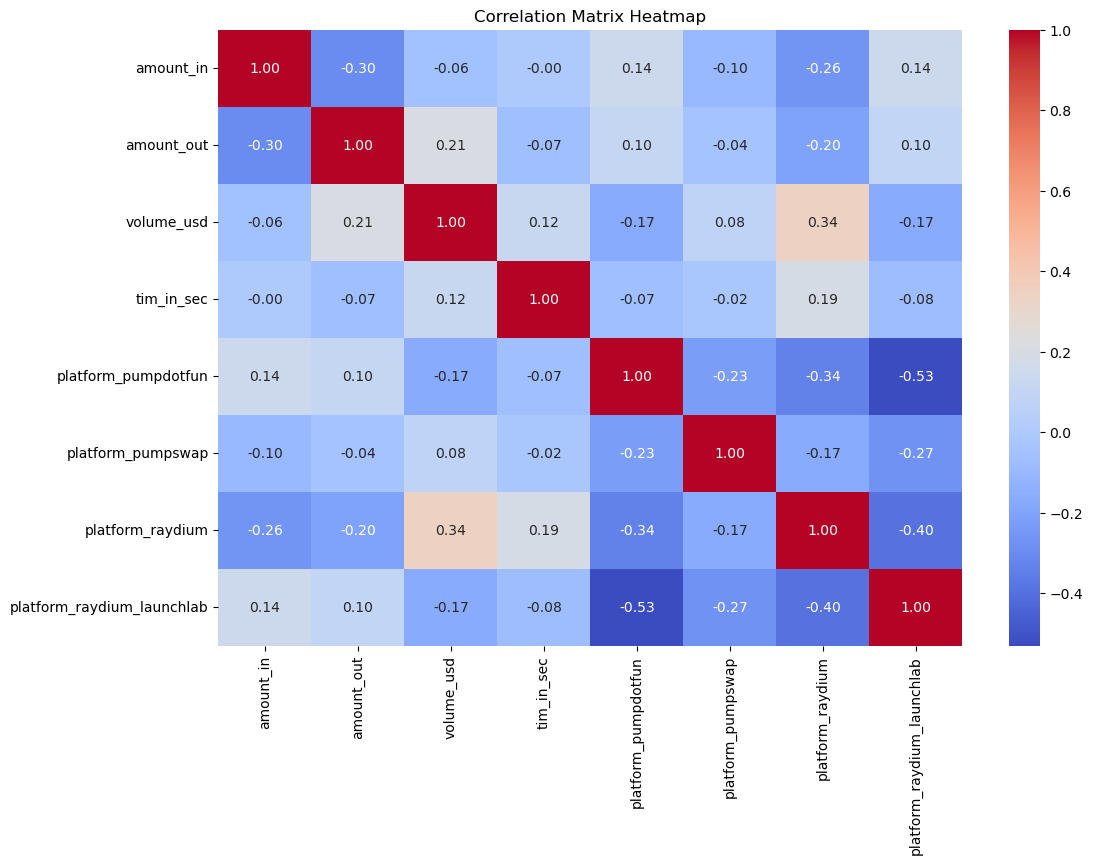

In [9]:
import seaborn as sns

# One-hot encode the 'platform' column
df_encoded = pd.get_dummies(df, columns=['platform'])

# Compute correlation matrix
corr_matrix = df_encoded.corr(numeric_only=True)
print(df_encoded)
# Plot heatmap of the correlation matrix
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

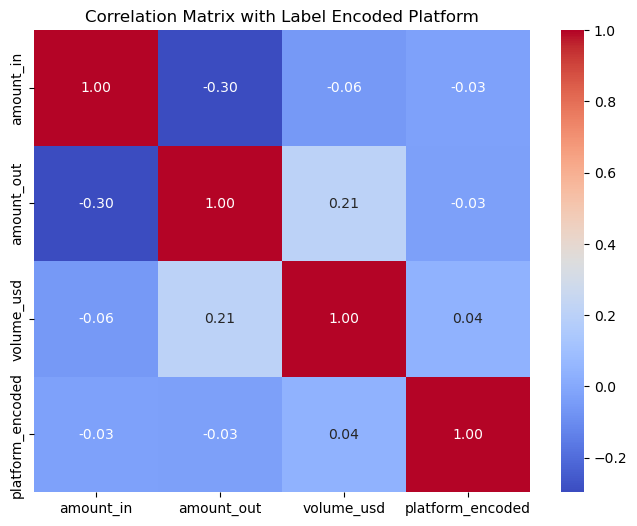

In [10]:
from sklearn.preprocessing import LabelEncoder

# Label encode the 'platform' column
le = LabelEncoder()
df['platform_encoded'] = le.fit_transform(df['platform'])

# Add the encoded column to the list of columns to correlate
corr_cols = numeric_cols + ['platform_encoded']

# Compute correlation matrix
corr_matrix_label = df[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_label, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix with Label Encoded Platform')
plt.show()

In [11]:
print(df['platform_encoded'].head())

0    0
1    2
2    3
3    3
4    3
Name: platform_encoded, dtype: int32


In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype          
---  ------            --------------  -----          
 0   amount_in         517 non-null    float64        
 1   amount_out        519 non-null    float64        
 2   in_token          517 non-null    object         
 3   out_token         519 non-null    object         
 4   platform          521 non-null    object         
 5   timestamp         521 non-null    object         
 6   tx_hash           521 non-null    object         
 7   volume_usd        521 non-null    float64        
 8   wallet            521 non-null    object         
 9   new_timestamp     521 non-null    datetime64[ns] 
 10  latency           520 non-null    timedelta64[ns]
 11  tim_in_sec        520 non-null    float64        
 12  platform_encoded  521 non-null    int32          
dtypes: datetime64[ns](1), float64(4), int32(1), object(6), timedelta6

In [13]:
print("Dataset Info:")
jn = ['new_timestamp', 'latency', 'tim_in_sec']
print(df[jn].head())

Dataset Info:
        new_timestamp         latency  tim_in_sec
0 2025-07-03 06:19:27             NaT         NaN
1 2025-07-03 06:25:57 0 days 00:06:30       390.0
2 2025-07-03 06:30:51 0 days 00:04:54       294.0
3 2025-07-03 06:31:08 0 days 00:00:17        17.0
4 2025-07-03 06:31:20 0 days 00:00:12        12.0


In [14]:
tn = [ 'amount_in', 'amount_out', 'volume_usd', 'new_timestamp', 'latency', 'tim_in_sec',]
print(df[tn].head())

      amount_in    amount_out  volume_usd       new_timestamp         latency  \
0  2.240868e+00  4.249080e+07  347.984331 2025-07-03 06:19:27             NaT   
1  2.816123e+04  1.980000e+00  307.711800 2025-07-03 06:25:57 0 days 00:06:30   
2  4.043684e+07  1.485000e+00  230.843250 2025-07-03 06:30:51 0 days 00:04:54   
3  4.620261e+06  2.475000e-01   38.473875 2025-07-03 06:31:08 0 days 00:00:17   
4  2.576764e+00  4.505710e+07  400.557939 2025-07-03 06:31:20 0 days 00:00:12   

   tim_in_sec  
0         NaN  
1       390.0  
2       294.0  
3        17.0  
4        12.0  


In [15]:
# Calculate trades/hour per wallet
# df['latency_seconds'] = df['latency_seconds'].fillna(0)
df = df.replace(['NAN', 'NAT', 'INVALID'], np.nan).fillna(1)
df['tim_in_sec'] = df['tim_in_sec'].round().astype(int)

# Ensure 'timestamp' is datetime
df['timestamp'] = pd.to_datetime(df['timestamp'].str.replace('\.000 UTC', '', regex=True))

trades_per_wallet = df.groupby('wallet').size()
time_span_per_wallet = df.groupby('wallet')['timestamp'].agg(['min', 'max'])
hours_per_wallet = (time_span_per_wallet['max'] - time_span_per_wallet['min']).dt.total_seconds() / 3600
trades_per_hour = trades_per_wallet / hours_per_wallet

print(trades_per_hour)

print(df)
# print(trades_per_hour)

wallet
DfMxre4cKmvogbLrPigxmibVTTQDuzjdXojWzjCXXhzj    12.268606
dtype: float64
        amount_in    amount_out   in_token  out_token           platform  \
0    2.240868e+00  4.249080e+07       WSOL     $25.8m         pumpdotfun   
1    2.816123e+04  1.980000e+00        BTC       WSOL            raydium   
2    4.043684e+07  1.485000e+00  æ£’ä¸­æŒ‡       WSOL  raydium_launchlab   
3    4.620261e+06  2.475000e-01  æ£’ä¸­æŒ‡       WSOL  raydium_launchlab   
4    2.576764e+00  4.505710e+07       WSOL  æ£’ä¸­æŒ‡  raydium_launchlab   
..            ...           ...        ...        ...                ...   
516  7.919672e-01  5.511007e+06       WSOL      Vroom           pumpswap   
517  4.735387e+06  9.900000e-01       LOAD       WSOL  raydium_launchlab   
518  2.167058e+07  4.950000e+00     CHEESE       WSOL            raydium   
519  1.000000e+00  1.485000e+00          1       WSOL  raydium_launchlab   
520  2.877420e+00  1.000000e+00       WSOL          1  raydium_launchlab   

       

In [16]:
# # Clean token anomalies
# df.loc[df['out_token'] == '$25.8m', 'out_token'] = 'INVALID'
print(df['out_token'].describe())
print('')
print('##############################')
print('')
print(df['out_token'].info())
print('')
print(df.head(10))

count      521
unique     106
top       WSOL
freq       366
Name: out_token, dtype: object

##############################

<class 'pandas.core.series.Series'>
RangeIndex: 521 entries, 0 to 520
Series name: out_token
Non-Null Count  Dtype 
--------------  ----- 
521 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB
None

      amount_in    amount_out   in_token  out_token           platform  \
0  2.240868e+00  4.249080e+07       WSOL     $25.8m         pumpdotfun   
1  2.816123e+04  1.980000e+00        BTC       WSOL            raydium   
2  4.043684e+07  1.485000e+00  æ£’ä¸­æŒ‡       WSOL  raydium_launchlab   
3  4.620261e+06  2.475000e-01  æ£’ä¸­æŒ‡       WSOL  raydium_launchlab   
4  2.576764e+00  4.505710e+07       WSOL  æ£’ä¸­æŒ‡  raydium_launchlab   
5  4.110873e+07  1.470297e+00    NimDoor       WSOL         pumpdotfun   
6  4.551012e+06  2.450495e-01    NimDoor       WSOL         pumpdotfun   
7  2.153435e+00  4.565974e+07       WSOL    NimDoor         pumpdotfun   
8 

In [17]:
# Implied price per unit of output token
df['price_out'] = np.where(df['amount_out'] > 0, df['volume_usd'] / df['amount_out'], np.nan)

# Price change percentage
df['price_change_pct'] = df['price_out'].pct_change() * 100

# Position size change (proxy for leverage)
df['position_change'] = df['amount_in'].pct_change()

# Profit/Loss pattern (simplified as volume change)
##### explain this for better understanding
df['pl_pattern'] = df['volume_usd'].diff()
df['consecutive_losses'] = (df['pl_pattern'] < 0).rolling(window=3).sum()
df['consecutive_wins'] = (df['pl_pattern'] > 0).rolling(window=3).sum()

# Display engineered features
print("\nEngineered Features:")
print(df[['latency', 'tim_in_sec', 'price_change_pct', 'position_change', 'pl_pattern', 'consecutive_losses', 'consecutive_wins']].head())


Engineered Features:
           latency  tim_in_sec  price_change_pct  position_change  pl_pattern  \
0                1           1               NaN              NaN         NaN   
1  0 days 00:06:30         390      1.897641e+09     12566.109686  -40.272531   
2  0 days 00:04:54         294      2.573837e-02      1434.904652  -76.868550   
3  0 days 00:00:17          17      0.000000e+00        -0.885741 -192.369375   
4  0 days 00:00:12          12     -9.999999e+01        -0.999999  362.084064   

   consecutive_losses  consecutive_wins  
0                 NaN               NaN  
1                 NaN               NaN  
2                 2.0               0.0  
3                 3.0               0.0  
4                 2.0               1.0  


In [18]:
wall = df['wallet'].unique()
for i in wall:
    print(i, end="")

DfMxre4cKmvogbLrPigxmibVTTQDuzjdXojWzjCXXhzj

In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   amount_in           521 non-null    float64       
 1   amount_out          521 non-null    float64       
 2   in_token            521 non-null    object        
 3   out_token           521 non-null    object        
 4   platform            521 non-null    object        
 5   timestamp           521 non-null    datetime64[ns]
 6   tx_hash             521 non-null    object        
 7   volume_usd          521 non-null    float64       
 8   wallet              521 non-null    object        
 9   new_timestamp       521 non-null    datetime64[ns]
 10  latency             521 non-null    object        
 11  tim_in_sec          521 non-null    int32         
 12  platform_encoded    521 non-null    int32         
 13  price_out           521 non-null    float64       

In [20]:
# use AI to check for for offset and rep with box plot

In [21]:
# Trade frequency per hour
df['hour'] = df['timestamp'].dt.floor('H')
trade_freq = df['hour'].value_counts().rename('trade_freq')

# Merge frequency back
df = df.merge(trade_freq, on='hour', how='left')

# Volume spike
mean_volume = df['volume_usd'].mean()
df['volume_spike'] = df['volume_usd'] > mean_volume * 1.2

print("\nAdditional Features:")
print(df[['timestamp', 'trade_freq', 'volume_spike']].head(20))


Additional Features:
             timestamp  trade_freq  volume_spike
0  2025-07-03 06:19:27          11         False
1  2025-07-03 06:25:57          11         False
2  2025-07-03 06:30:51          11         False
3  2025-07-03 06:31:08          11         False
4  2025-07-03 06:31:20          11          True
5  2025-07-03 06:31:52          11         False
6  2025-07-03 06:32:10          11         False
7  2025-07-03 06:32:21          11         False
8  2025-07-03 06:32:40          11         False
9  2025-07-03 06:39:22          11          True
10 2025-07-03 06:56:37          11          True
11 2025-07-03 14:48:07           2          True
12 2025-07-03 14:48:32           2          True
13 2025-07-03 15:28:44          11          True
14 2025-07-03 15:29:06          11         False
15 2025-07-03 15:29:33          11         False
16 2025-07-03 15:34:34          11          True
17 2025-07-03 15:34:42          11          True
18 2025-07-03 15:38:15          11         Fals

In [22]:
# Convert timestamps
df['timesamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timesamp')

# Time difference
df['time_diff'] = df['timesamp'].diff().dt.total_seconds() / 60  # In minutes



# Price per unit (approximate)
df['price_in'] = df['volume_usd'] / df['amount_in']
df['price_out'] = df['volume_usd'] / df['amount_out'].replace("$25.8m", 25800000)  # Handle outlier

# Profit/loss (simplified)
df['pnl'] = df['price_out'].shift(1) - df['price_in']  # Compare consecutive trades

print(df[['timestamp', 'time_diff', 'price_in', 'price_out', 'pnl']])



              timestamp  time_diff    price_in   price_out           pnl
0   2025-07-03 06:19:27        NaN  155.290000    0.000008           NaN
1   2025-07-03 06:25:57   6.500000    0.010927  155.410000 -1.091860e-02
2   2025-07-03 06:30:51   4.900000    0.000006  155.450000  1.554100e+02
3   2025-07-03 06:31:08   0.283333    0.000008  155.450000  1.554500e+02
4   2025-07-03 06:31:20   0.200000  155.450000    0.000009  1.086633e-08
..                  ...        ...         ...         ...           ...
516 2025-07-05 00:00:58   7.900000  147.810000    0.000021 -3.999997e-02
517 2025-07-05 00:13:25  12.450000    0.000031  147.850000 -9.668892e-06
518 2025-07-05 00:34:00  20.583333    0.000034  148.420000  1.478500e+02
519 2025-07-05 00:46:53  12.883333  220.403700  148.420000 -7.198370e+01
520 2025-07-05 00:47:25   0.533333  148.420000  427.066656 -1.055807e-08

[521 rows x 5 columns]


In [23]:
df.head()

,amount_in,amount_out,in_token,out_token,platform,timestamp,tx_hash,volume_usd,wallet,new_timestamp,...,pl_pattern,consecutive_losses,consecutive_wins,hour,trade_freq,volume_spike,timesamp,time_diff,price_in,pnl
0,2.240868e+00,4.249080e+07,WSOL,$25.8m,pumpdotfun,2025-07-03 06:19:27,38QSi6fxtJsWUyZudkEq1UNFRXrpvuxeFXgypXsUisDcei...,347.984331,DfMxre4cKmvogbLrPigxmibVTTQDuzjdXojWzjCXXhzj,2025-07-03 06:19:27,...,NaN,NaN,NaN,2025-07-03 06:00:00,11,False,2025-07-03 06:19:27,NaN,155.290000,NaN
1,2.816123e+04,1.980000e+00,BTC,WSOL,raydium,2025-07-03 06:25:57,2M2YYdMRZdopiBjcaz3kykeAJoig6uJiXSgjcduazbnXSQ...,307.711800,DfMxre4cKmvogbLrPigxmibVTTQDuzjdXojWzjCXXhzj,2025-07-03 06:25:57,...,-40.272531,NaN,NaN,2025-07-03 06:00:00,11,False,2025-07-03 06:25:57,6.500000,0.010927,-1.091860e-02
2,4.043684e+07,1.485000e+00,æ£’ä¸­æŒ‡,WSOL,raydium_launchlab,2025-07-03 06:30:51,5T9gTV3Lw982t9taYxpsVhCiso7NF4fPr25ZHU5nbqYbxW...,230.843250,DfMxre4cKmvogbLrPigxmibVTTQDuzjdXojWzjCXXhzj,2025-07-03 06:30:51,...,-76.868550,2.0,0.0,2025-07-03 06:00:00,11,False,2025-07-03 06:30:51,4.900000,0.000006,1.554100e+02
3,4.620261e+06,2.475000e-01,æ£’ä¸­æŒ‡,WSOL,raydium_launchlab,2025-07-03 06:31:08,2FXLpLwv941PnVYwAtyXKKzhj4qZcZRwVBrEUNbWedJhd4...,38.473875,DfMxre4cKmvogbLrPigxmibVTTQDuzjdXojWzjCXXhzj,2025-07-03 06:31:08,...,-192.369375,3.0,0.0,2025-07-03 06:00:00,11,False,2025-07-03 06:31:08,0.283333,0.000008,1.554500e+02
4,2.576764e+00,4.505710e+07,WSOL,æ£’ä¸­æŒ‡,raydium_launchlab,2025-07-03 06:31:20,5ozr4Sv9kGFKzhTFM71rLt8VSWZBHzkN7nXssMfriM5UR8...,400.557939,DfMxre4cKmvogbLrPigxmibVTTQDuzjdXojWzjCXXhzj,2025-07-03 06:31:20,...,362.084064,2.0,1.0,2025-07-03 06:00:00,11,True,2025-07-03 06:31:20,0.200000,155.450000,1.086633e-08


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   amount_in           521 non-null    float64       
 1   amount_out          521 non-null    float64       
 2   in_token            521 non-null    object        
 3   out_token           521 non-null    object        
 4   platform            521 non-null    object        
 5   timestamp           521 non-null    datetime64[ns]
 6   tx_hash             521 non-null    object        
 7   volume_usd          521 non-null    float64       
 8   wallet              521 non-null    object        
 9   new_timestamp       521 non-null    datetime64[ns]
 10  latency             521 non-null    object        
 11  tim_in_sec          521 non-null    int32         
 12  platform_encoded    521 non-null    int32         
 13  price_out           521 non-null    float64       

In [25]:
df.to_csv('C:/Users/Jeremy S Obozuwa/Documents/new_det.csv', index=False)

In [26]:
#### ASSIGN A DEF TO BLOCK CODE AS A FUNCTION

# Initialize emotion columns
df['emotion'] = 'neutral'  #importance of neutral
df['trigger_details'] = None

# Apply rules
for i in range(1, len(df)):
    prev_row = df.iloc[i-1]
    curr_row = df.iloc[i]
    
    # FOMO: Price spike >20% within 30min
    if (curr_row['price_change_pct'] > 20 and curr_row['latency'] < timedelta(minutes=30) and curr_row['pl_pattern'] > 0):
        df.loc[i, 'emotion'] = 'fomo'
        df.loc[i, 'trigger_details'] = f"Price spike: {curr_row['price_change_pct']:.2f}%, latency: {curr_row['latency']}"
    
    # Revenge: Trade within 2min after loss
    elif (curr_row['latency'] < timedelta(minutes=2) and prev_row['pl_pattern'] < 0):
        df.loc[i, 'emotion'] = 'revenge'
        df.loc[i, 'trigger_details'] = f"After loss: {prev_row['pl_pattern']:.2f}, latency: {curr_row['latency']}"
    
    # Greed: Position increase >50% after win
    elif (curr_row['position_change'] > 0.5 and prev_row['pl_pattern'] > 0):
        df.loc[i, 'emotion'] = 'greed'
        df.loc[i, 'trigger_details'] = f"After win: {prev_row['pl_pattern']:.2f}, pos change: {curr_row['position_change']:.2f}"
    
    # Fear: Early close with small profit
    elif (curr_row['latency'] < timedelta(minutes=1) and curr_row['pl_pattern'] > 0 and abs(curr_row['pl_pattern']) < 10):
        df.loc[i, 'emotion'] = 'fear'
        df.loc[i, 'trigger_details'] = f"Early close: {curr_row['pl_pattern']:.2f}, latency: {curr_row['latency']}"

print("\nEmotion Detection Results:")
print(df[['timestamp', 'emotion', 'trigger_details']].tail())


Emotion Detection Results:
              timestamp  emotion  \
516 2025-07-05 00:00:58  neutral   
517 2025-07-05 00:13:25     fomo   
518 2025-07-05 00:34:00    greed   
519 2025-07-05 00:46:53  neutral   
520 2025-07-05 00:47:25     fomo   

                                       trigger_details  
516                                               None  
517  Price spike: 696051154.77%, latency: 0 days 00...  
518                 After win: 29.31, pos change: 3.58  
519                                               None  
520     Price spike: 187.74%, latency: 0 days 00:00:32  


In [27]:
df.to_csv('C:/Users/Jeremy S Obozuwa/Documents/new_det_result.csv', index=False)

In [28]:
output = df[['timestamp', 'amount_in', 'amount_out', 'in_token', 'out_token', 'volume_usd', 'emotion', 'trigger_details']].to_dict(orient='records')
print("\nOutput per Trade:")
for trade in output[:5]:
    print(trade)


Output per Trade:
{'timestamp': Timestamp('2025-07-03 06:19:27'), 'amount_in': 2.240867611, 'amount_out': 42490798.02, 'in_token': 'WSOL', 'out_token': '$25.8m', 'volume_usd': 347.9843313, 'emotion': 'neutral', 'trigger_details': None}
{'timestamp': Timestamp('2025-07-03 06:25:57'), 'amount_in': 28161.22906, 'amount_out': 1.98, 'in_token': 'BTC', 'out_token': 'WSOL', 'volume_usd': 307.7118, 'emotion': 'neutral', 'trigger_details': None}
{'timestamp': Timestamp('2025-07-03 06:30:51'), 'amount_in': 40436839.82, 'amount_out': 1.485, 'in_token': 'æ£’ä¸\xadæŒ‡', 'out_token': 'WSOL', 'volume_usd': 230.84325, 'emotion': 'neutral', 'trigger_details': None}
{'timestamp': Timestamp('2025-07-03 06:31:08'), 'amount_in': 4620260.825, 'amount_out': 0.2475, 'in_token': 'æ£’ä¸\xadæŒ‡', 'out_token': 'WSOL', 'volume_usd': 38.473875, 'emotion': 'revenge', 'trigger_details': 'After loss: -76.87, latency: 0 days 00:00:17'}
{'timestamp': Timestamp('2025-07-03 06:31:20'), 'amount_in': 2.57676384, 'amount_ou

In [29]:
# Prepare data for ML training
ml_df = df[['wallet', 'time_diff', 'price_change_pct', 'position_change','consecutive_losses', 'consecutive_wins','volume_spike', 'emotion']]

# print(ml_df)

# Encode emotion as target
ml_df = ml_df.dropna()
ml_df = ml_df[ml_df['emotion'] != 'neutral']  # Focus on detected emotions
X = ml_df[['time_diff', 'price_change_pct', 'position_change', 'consecutive_losses', 'consecutive_wins', 'volume_spike']]
y = ml_df['emotion']

# Label encoding for emotions
emotion_map = {'fomo': 0, 'revenge': 1, 'greed': 2, 'fear': 3}
y = y.map(emotion_map)


In [30]:
import pandas as pd
import numpy as np
from datetime import timedelta
import json
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

ML Model Accuracy: 0.87

Classification Report:
              precision    recall  f1-score   support

        fomo       0.67      0.50      0.57         4
     revenge       0.94      0.92      0.93        36
       greed       0.78      0.90      0.84        20
        fear       1.00      0.67      0.80         3

    accuracy                           0.87        63
   macro avg       0.85      0.75      0.78        63
weighted avg       0.88      0.87      0.87        63



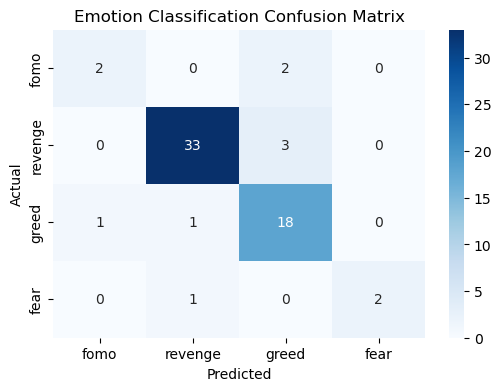

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Train ML model

if len(X) < 2 or len(y) < 2:
    print("Insufficient data for ML training")
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Save model for deployment
    import joblib
    joblib.dump(model, 'emotion_predictor.pkl')
    joblib.dump(le, 'label_encoder.pkl')

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"ML Model Accuracy: {accuracy:.2f}")

    # Classification report
    import matplotlib.pyplot as plt

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['fomo', 'revenge', 'greed', 'fear']))

    # Confusion matrix heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['fomo', 'revenge', 'greed', 'fear'], yticklabels=['fomo', 'revenge', 'greed', 'fear'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Emotion Classification Confusion Matrix')
    plt.show()

where 'fomo': 0, 'revenge': 1, 'greed': 2, and 'fear': 3.
Hence:
ML Model Accuracy: 0.87


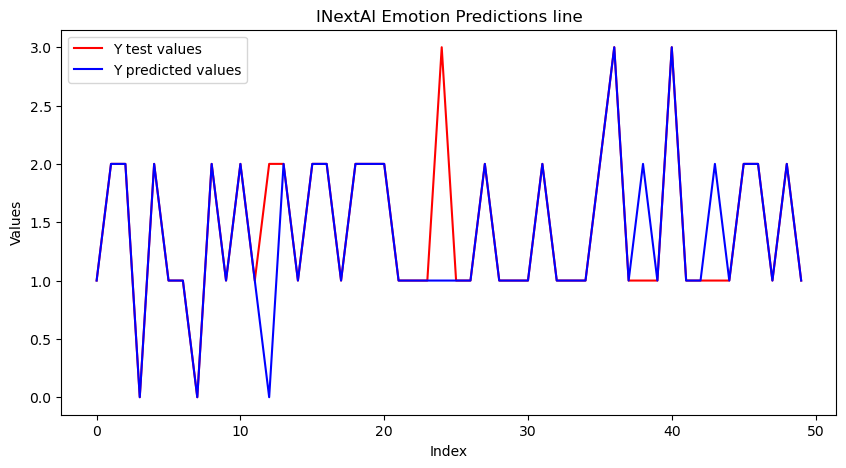

In [32]:
print ("where 'fomo': 0, 'revenge': 1, 'greed': 2, and 'fear': 3.\nHence:")
print(f"ML Model Accuracy: {accuracy:.2f}")

# Plot comparison between test and predicted values
def plot_predictions(y_test, y_pred, title):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test[:50].values, color='red', label='Y test values')
    plt.plot(y_pred[:50], color='blue', label='Y predicted values')
    plt.title(title)
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

plot_predictions(y_test, y_pred, 'INextAI Emotion Predictions line')

In [ ]:
# Predict next emotion
def predict_next_emotion(df, model, le):
    if len(df) < 4:
        return "neutral", "Not enough trades for prediction"
    last3 = df.iloc[-3:].copy()
    features = {
        'time_diff': last3['time_diff'].mean(),
        'price_change_pct': last3['price_change_pct'].mean(),
        'position_change': last3['position_change'].mean(),
        'consecutive_wins': last3['consecutive_wins'].iloc[-1],
        'consecutive_losses': last3['consecutive_losses'].iloc[-1],
        'win_streak': last3['win_streak'].iloc[-1],
        'loss_streak': last3['loss_streak'].iloc[-1]
    }
    X_pred = pd.DataFrame([features])
    pred_encoded = model.predict(X_pred)[0]
    emotion = le.inverse_transform([pred_encoded])[0]
    return emotion, "Prediction based on last 3 trades"

# Test prediction
if len(X) > 0:
    emotion, details = predict_next_emotion(df, model, le)
    # logger.info
    print(f"Predicted Next Emotion: {emotion}, Details: {details}")

STOP HERE..........

STOP HERE..............


BRLOW ARE COUPLE OF ROUGH WORK AND TRIALS......

..............................................................................................................................


In [ ]:
# AI Copilot advice
def get_copilot_advice(wallet_df):
    recent_trades = wallet_df.tail(4).to_dict(orient='records')
    prompt = f"""
    User with wallet {wallet_df['wallet'].iloc[0]} has traded {len(recent_trades)} times in 30 minutes. 
    Most recent trade showed {wallet_df['emotion'].iloc[-1]} during a price change of {wallet_df['price_change_pct'].iloc[-1]:.2f}%. 
    Give emotional feedback and suggest action.
    Trade History: {json.dumps(recent_trades, default=str)}
    """
    try:
        response = client.chat.completions.create(
            model="gpt-4",
            messages=[{"role": "user", "content": prompt}],
            timeout=30
        )
        advice = response.choices[0].message.content
        return json.loads(advice) if advice.startswith('{') else {"copilot_advice": advice, "recommendation": "none"}
    except Exception as e:
        print(f"Error getting copilot advice: {e}")
        return {"copilot_advice": "Unable to provide advice due to an error.", "recommendation": "none"}


In [ ]:
file_path_single = "trading_data_single.csv" # refer to user dataset/ dataframe
print("Testing single user dataset")
df_single = load_and_preprocess_data(file_path_single) # converting to readable data set and what have you
features_dict_single = engineer_features(df_single)    # Feature enginerring aspect where X_label are selected and sorted
for wallet, wallet_df in features_dict_single.items():
    wallet_df = predict_next_emotion(wallet_df)
    features_dict_single[wallet] = wallet_df
    output_file = f"trades_{wallet}_single.json"
    wallet_df.to_json(output_file, orient='records')
    print(f"Saved single user data for {wallet} to {output_file}")
    advice = get_copilot_advice(wallet_df)
    print(f"Copilot Advice for {wallet}: {json.dumps(advice)}")


further analysis


machine learning section 

here we go hehehe


In [ ]:
import pandas as pd
import numpy as np
from datetime import timedelta
import json
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import logging
from openai import OpenAI 

In [ ]:
# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)




# Update the main execution block
if __name__ == "__main__":
    # Test single user
    file_path_single = "trading_data_single.csv"
    logger.info("Testing single user dataset")
    df_single = load_and_preprocess_data(file_path_single)
    features_dict_single = engineer_features(df_single)
    for wallet, wallet_df in features_dict_single.items():
        wallet_df = detect_emotions(wallet_df)
        features_dict_single[wallet] = wallet_df
        output_file = f"trades_{wallet}_single.json"
        wallet_df.to_json(output_file, orient='records')
        logger.info(f"Saved single user data for {wallet} to {output_file}")
        advice = get_copilot_advice(wallet_df)
        logger.info(f"Copilot Advice for {wallet}: {json.dumps(advice)}")
    
    X_single, y_single = prepare_ml_data(features_dict_single)
    if X_single is not None and not X_single.empty:
        model = train_ml_model(X_single, y_single)
    else:
        logger.warning("Insufficient data for ML training with single user")

    # Test multiple users
    file_path_multi = "trading_data_multi.csv"
    logger.info("Testing multiple user dataset")
    df_multi = load_and_preprocess_data(file_path_multi)
    features_dict_multi = engineer_features(df_multi)
    for wallet, wallet_df in features_dict_multi.items():
        wallet_df = detect_emotions(wallet_df)
        features_dict_multi[wallet] = wallet_df
        output_file = f"trades_{wallet}_multi.json"
        wallet_df.to_json(output_file, orient='records')
        logger.info(f"Saved multi-user data for {wallet} to {output_file}")
        advice = get_copilot_advice(wallet_df)
        logger.info(f"Copilot Advice for {wallet}: {json.dumps(advice)}")
    
    X_multi, y_multi = prepare_ml_data(features_dict_multi)
    if X_multi is not None and not X_multi.empty:
        model = train_ml_model(X_multi, y_multi)
    else:
        logger.warning("Insufficient data for ML training with multiple users")

In [ ]:
timestamps = [
    "2025-07-03 06:19:27.000 UTC",
    "2025-07-03 06:25:57.000 UTC",
    "2025-07-03 06:30:51.000 UTC",
    "2025-07-03 06:31:08.000 UTC",
    "2025-07-03 06:31:20.000 UTC",
    "2025-07-03 06:31:52.000 UTC"
]

In [ ]:
# Create DataFrame
ddf = pd.DataFrame({'timestamp': timestamps})

lit = ['ewewe1', 'erere2', 'fgfgf3','hghgh4','erere2','ewewe1',]
ddf['wallet'] = pd.DataFrame(lit)
# Convert to datetime - removing '.000 UTC' completely
ddf['timestamp'] = pd.to_datetime(ddf['timestamp'].str.replace('\.000 UTC', '', regex=True))

# Calculate latency as timedelta
ddf['latency_timedelta'] = ddf['timestamp'].diff()

# Calculate latency in seconds
ddf['latency_seconds'] = ddf['latency_timedelta'].dt.total_seconds()

print(ddf.head())

            timestamp  wallet latency_timedelta  latency_seconds
0 2025-07-03 06:19:27  ewewe1               NaT              NaN
1 2025-07-03 06:25:57  erere2   0 days 00:06:30            390.0
2 2025-07-03 06:30:51  fgfgf3   0 days 00:04:54            294.0
3 2025-07-03 06:31:08  hghgh4   0 days 00:00:17             17.0
4 2025-07-03 06:31:20  erere2   0 days 00:00:12             12.0


In [ ]:
# Calculate trades/hour per wallet
# ddf['latency_seconds'] = ddf['latency_seconds'].fillna(0)
ddf = ddf.replace(['NAN', 'NAT', 'INVALID'], np.nan).fillna(1)
ddf['latency_seconds'] = ddf['latency_seconds'].round().astype(int)

trades_per_wallet = ddf.groupby('wallet').size()
time_span_per_wallet = ddf.groupby('wallet')['timestamp'].agg(['min', 'max'])
hours_per_wallet = (time_span_per_wallet['max'] - time_span_per_wallet['min']).dt.total_seconds() / 3600
trades_per_hour = trades_per_wallet / hours_per_wallet

print(trades_per_hour)

print(ddf)
# print(trades_per_hour)

            timestamp  wallet latency_timedelta  latency_seconds
0 2025-07-03 06:19:27  ewewe1                 1                1
1 2025-07-03 06:25:57  erere2   0 days 00:06:30              390
2 2025-07-03 06:30:51  fgfgf3   0 days 00:04:54              294
3 2025-07-03 06:31:08  hghgh4   0 days 00:00:17               17
4 2025-07-03 06:31:20  erere2   0 days 00:00:12               12
5 2025-07-03 06:31:52  ewewe1   0 days 00:00:32               32


In [ ]:
# Calculate trades per hour per wallet
trades_per_wallet = ddf.groupby('wallet').size()
time_span_per_wallet = ddf.groupby('wallet')['timestamp'].agg(['min', 'max'])
hours_per_wallet = (time_span_per_wallet['max'] - time_span_per_wallet['min']).dt.total_seconds() / 3600
trades_per_hour = trades_per_wallet / hours_per_wallet

print(trades_per_hour)

wallet
erere2    22.291022
ewewe1     9.664430
fgfgf3          inf
hghgh4          inf
dtype: float64


In [ ]:
0/1

0.0